# Live Code 2

## Perkenalan
Nama    : Judan Syamsul Hadad

Batch   : FTDS-009

1. Buatlah model Machine Learning untuk mengklasifikasikan rentang harga (`price_range`). Bandingkan antara model Decision Tree dan Random Forest. **Analisa dua buah model ini dan tentukan model yang terbaik untuk data ini** ! 
   * [Dataset URL](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)
   * Gunakan file `train.csv` sebagat `train-set` dan `test-set`.
   * Gunakan file `test.csv` sebagain `inference-set`.

2. Lakukan EDA dengan minimal menjawab pertanyaan dibawah ini : 
   1. Buatlah visualisasi yang membandingkan jumlah mobile phone yang support 3G dan 4G !
   2. Buatlah visualisasi yang membandingkan antara support 4G dan `price_range`! Apakah 4G mempengaruhi `price_range` ?
   3. Buatlah visualisasi yang membandingkan antara RAM dan `price_range` ! Apakah RAM mempengaruhi `price_range` ?
   4. Buatlah visualisasi yang membandingkan antara jumlah core dan `price_range` ! Apakah jumlah core mempengaruhi `price_range` ?
   5. Narasikan visualisasi poin 2.1 hingga 2.4 !

Keterangan dataset:
- id:ID
- battery_power:Total energy a battery can store in one time measured in mAh
- blue:Has bluetooth or not
- clock_speed:speed at which microprocessor executes instructions
- dual_sim:Has dual sim support or not
- fc:Front Camera mega pixels
- four_g:Has 4G or not
- int_memory:Internal Memory in Gigabytes
- m_dep:Mobile Depth in cm
- mobile_wt:Weight of mobile phone
- n_cores:Number of cores of processor
- pc:Primary Camera mega pixels
- px_height:Pixel Resolution Height
- px_width:Pixel Resolution Width
- ram:Random Access Memory in Megabytes
- sc_h:Screen Height of mobile in cm
- sc_w:Screen Width of mobile in cm
- talk_time:longest time that a single battery charge will last when you are
- three_g:Has 3G or not
- touch_screen:Has touch screen or not
- wifi:Has wifi or not

## Pendahuluan Soal

### Import Libraries

In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#validation and evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score

### Data Loading

Deklarasi random state untuk notebook ini.

In [58]:
random_state = 34

Set display agar menampilkan seluruh kolom.

In [59]:
pd.set_option('display.max_columns', None)

Load dataset.

In [60]:
data_traintest = pd.read_csv('train.csv')
data_inf = pd.read_csv('test.csv')

Copy data_traintest.

In [61]:
df = data_traintest.copy()

In [62]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Tidak ada missing value pada dataset. Ada kolom kategorikal yang sudah ditransformasikan ke nilai numerik, yaitu:
- blue
- dual_sim
- four_g
- three_g
- touch_screen
- wifi
- n_cores

Kelompokkan kolom berdasarkan tipe datanya.

In [64]:
cat_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen', 'n_cores']
num_cols = df.drop(cat_cols, axis=1).drop('price_range', axis=1).columns.tolist()

Cek jumlah unique value pada dataset.

In [65]:
df.nunique().sort_values()

blue                2
touch_screen        2
dual_sim            2
four_g              2
three_g             2
wifi                2
price_range         4
n_cores             8
m_dep              10
sc_h               15
talk_time          19
sc_w               19
fc                 20
pc                 21
clock_speed        26
int_memory         63
mobile_wt         121
battery_power    1094
px_width         1109
px_height        1137
ram              1562
dtype: int64

Cek statistika deskriptif pada dataset.

In [66]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.21300,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0


Berikut beberapa hal yang dapat disimpulkan dari statistika deskriptif dataset:
- `fc` terlihat memiliki rentang yang jauh antara Q3 dan maksimum, menandakan ada outlier
- `pc_height` terlihat memiliki rentang yang jauh antara Q3 dan maksimum, menandakan ada outlier
- `sc_w` terlihat memiliki rentang yang jauh antara Q3 dan maksimum, menandakan ada outlier

Cek apakah ada data yang duplikat atau tidak.

In [67]:
df.duplicated().sum()

0

Tidak ada data yang duplikat.

## Soal Nomor 2

2. Lakukan EDA dengan minimal menjawab pertanyaan dibawah ini : 
   1. Buatlah visualisasi yang membandingkan jumlah mobile phone yang support 3G dan 4G !
   2. Buatlah visualisasi yang membandingkan antara support 4G dan `price_range`! Apakah 4G mempengaruhi `price_range` ?
   3. Buatlah visualisasi yang membandingkan antara RAM dan `price_range` ! Apakah RAM mempengaruhi `price_range` ?
   4. Buatlah visualisasi yang membandingkan antara jumlah core dan `price_range` ! Apakah jumlah core mempengaruhi `price_range` ?
   5. Narasikan visualisasi poin 2.1 hingga 2.4 !

### Exploratory Data Analysis (EDA)

Pada EDA akan dilakukan beberapa analisis dasar faktor-faktor yang mungkin mempengaruhi `price_range`.

Pertama-tama, cek jumlah handphone berdasarkan network type-nya. Handphone dengan network type selain 3G dan 4G dianggap sebagai 2G. Lihat visualisasi di bawah ini.

<function matplotlib.pyplot.show(close=None, block=None)>

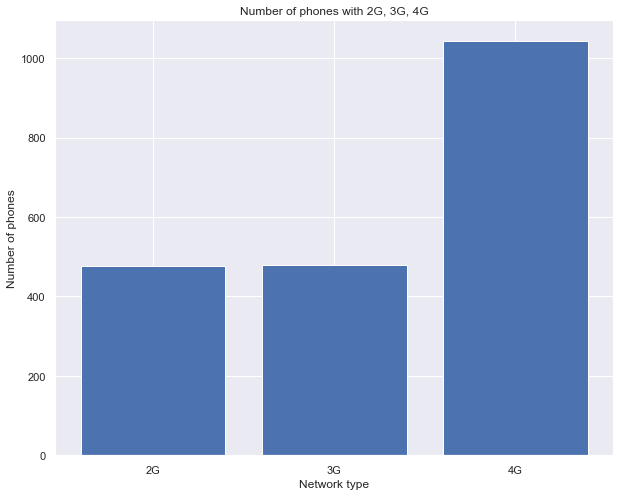

In [68]:
#grouping berdasarkan network type
df_g = df[['three_g', 'four_g', 'wifi']].groupby(['three_g', 'four_g']).count().reset_index()

#barplot
plt.figure(figsize=(10,8))
plt.bar(x=['2G','3G','4G'], height=df_g['wifi'])
plt.title('Number of phones with 2G, 3G, 4G')
plt.ylabel('Number of phones')
plt.xlabel('Network type')
plt.show

Dari grafik terlihat bahwa ada handphone dengan network type 2G dan jumlahnya terlihat sama dengan yang memiliki network type 3G. Mayoritas handphone pada dataset memiliki network type 4G.

Lihat pengaruh network type terhadap `price_range` pada grafik berikut.

<function matplotlib.pyplot.show(close=None, block=None)>

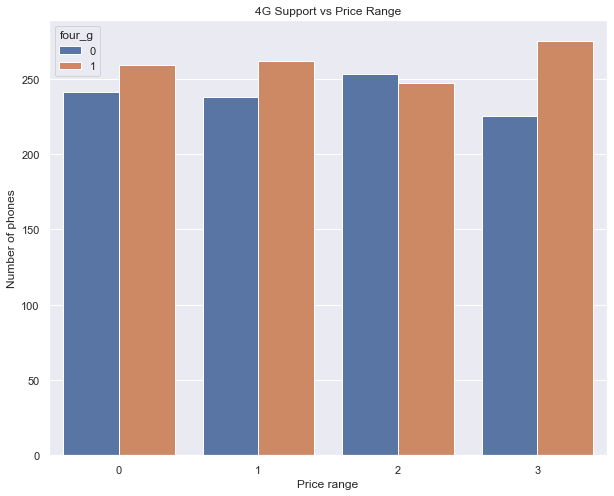

In [69]:
#grouping berdasarkan price range untuk handphone dengan 4G
df_price_range = df[['price_range','four_g','three_g']].groupby(['price_range','four_g']).count().reset_index()

#barplot
plt.figure(figsize=(10,8))
sns.barplot(data=df_price_range, x='price_range', y='three_g', hue='four_g')
plt.title('4G Support vs Price Range')
plt.ylabel('Number of phones')
plt.xlabel('Price range')
plt.show

Pada grafik terlihat bahwa handphone yang support 4G memiliki jumlah yang tidak berbeda jauh di tiap `price_range`. Begitu juga ketika handphone tidak support 4G, jumlahnya pada masing-masing price range tidak terlihat memiliki perbedaan jauh.

Bagaimana dengan RAM? Apakah berpengaruh terhadap `price_range`? Lihat grafik berikut.

<function matplotlib.pyplot.show(close=None, block=None)>

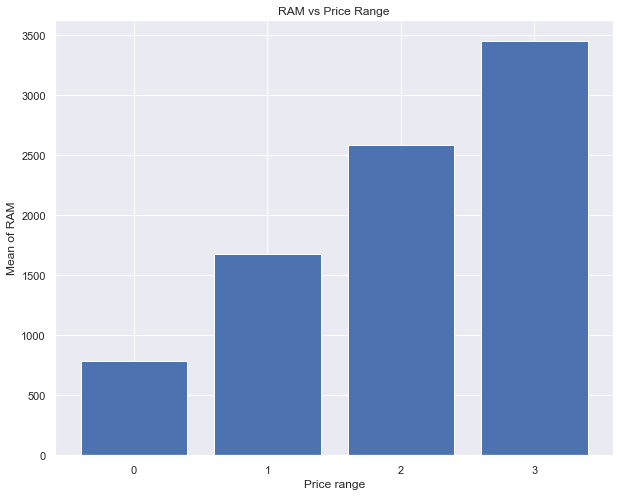

In [70]:
#grouping berdasarkan price range untuk handphone dengan 4G
df_ram = df[['price_range','ram']].groupby('price_range').mean().reset_index()

#barplot
plt.figure(figsize=(10,8))
plt.bar(x=['0','1','2','3'], height=df_ram['ram'])
plt.title('RAM vs Price Range')
plt.ylabel('Mean of RAM')
plt.xlabel('Price range')
plt.show

Jika dianggap 0 adalah `price_range` terendah dan 3 adalah tertinggi, dengan meningkatnya RAM maka `price_range` juga akan meningkat. 

<function matplotlib.pyplot.show(close=None, block=None)>

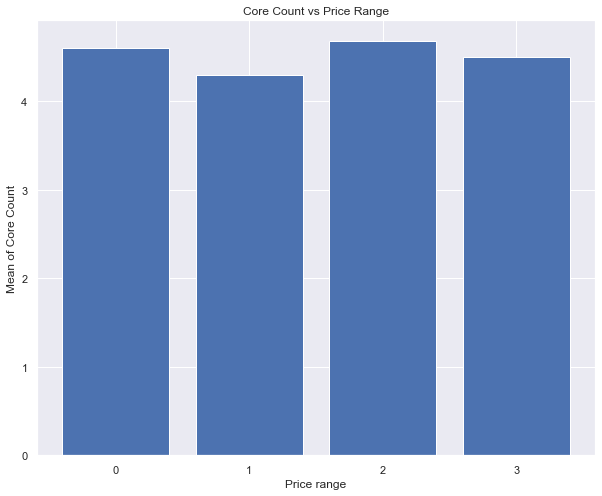

In [71]:
#grouping berdasarkan price range untuk handphone dengan 4G
df_core = df[['price_range','n_cores']].groupby('price_range').mean().reset_index()

#barplot
plt.figure(figsize=(10,8))
plt.bar(x=['0','1','2','3'], height=df_core['n_cores'])
plt.title('Core Count vs Price Range')
plt.ylabel('Mean of Core Count')
plt.xlabel('Price range')
plt.show

Jika dilihat dari grafik, rata-rata core count tidak berubah di tiap `price_range`. Bisa diasumsikan bahwa core count tidak memiliki pengaruh terhadap `price_range`.

Cek distribusi data berdasarkan `price_range`.

<function matplotlib.pyplot.show(close=None, block=None)>

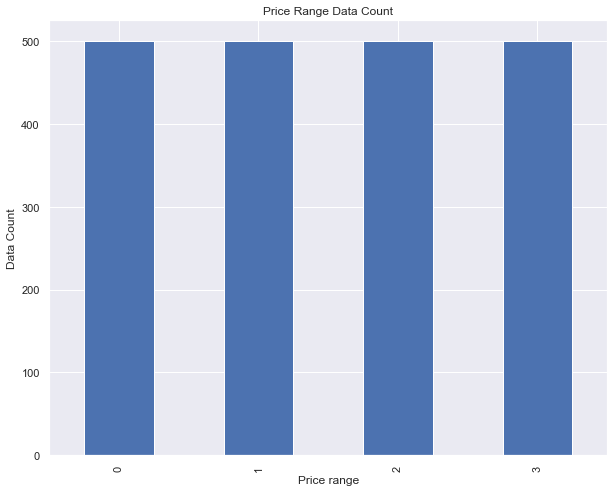

In [72]:
#barplot
plt.figure(figsize=(10,8))
df[['price_range','four_g']].groupby('price_range').count()['four_g'].plot(kind='bar')
plt.title('Price Range Data Count')
plt.ylabel('Data Count')
plt.xlabel('Price range')
plt.show

Jumlah data `price_range` terdistribusi merata.

Terakhir, cek korelasi antar feature numerik.

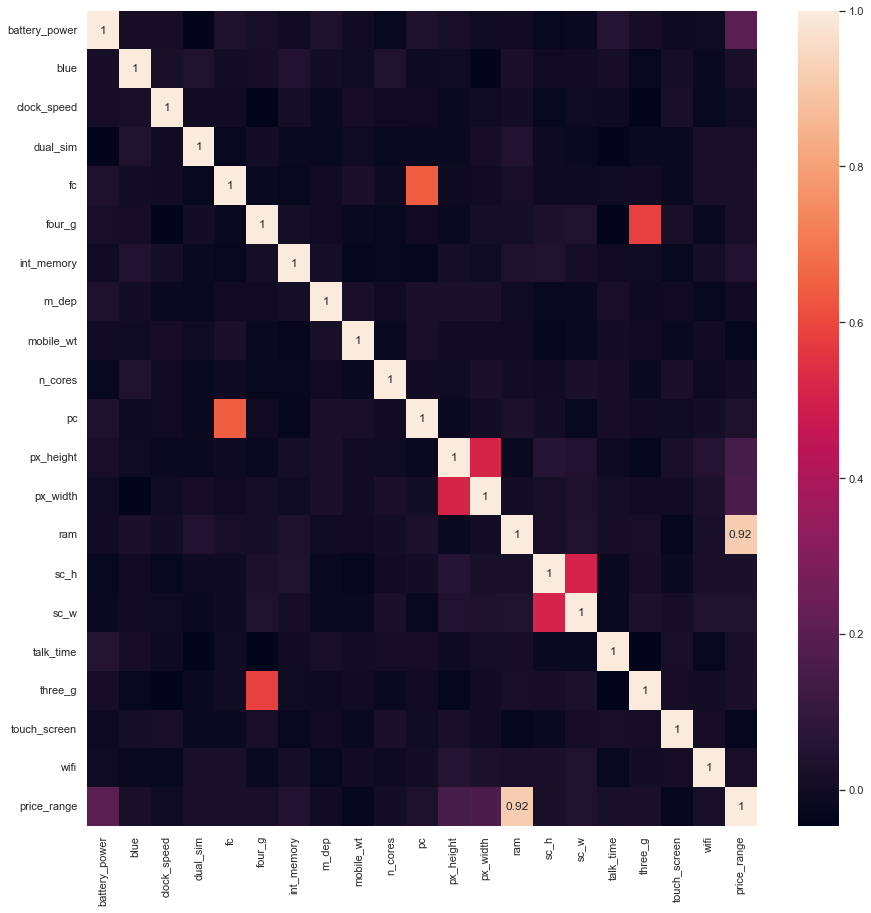

In [73]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df.corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

Korelasi kuat dianggap bernilai di atas 0.7 atau kurang dari -0.7.

Dari keseluruhan feature, `price_range` sangat dipengaruhi oleh RAM dilihat dari korelasi Pearson yang sangat tinggi (0.92).

Dari keseluruhan analisis pada EDA akan dibuktikan dengan pemodelan di bab-bab berikutnya.

#### Cardinality

Pastikan cardinality dari data kategorikal.

In [74]:
df[cat_cols].nunique()

blue            2
dual_sim        2
four_g          2
three_g         2
wifi            2
touch_screen    2
n_cores         8
dtype: int64

Tidak ada kategori yang memiliki cardinality tinggi.

## Soal Nomor 1

1. Buatlah model Machine Learning untuk mengklasifikasikan rentang harga (`price_range`). Bandingkan antara model Decision Tree dan Random Forest. **Analisa dua buah model ini dan tentukan model yang terbaik untuk data ini** ! 
   * [Dataset URL](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)
   * Gunakan file `train.csv` sebagat `train-set` dan `test-set`.
   * Gunakan file `test.csv` sebagain `inference-set`.

### Data Preprocessing

Pada bab ini akan dilakukan pengolahan data sebelum dilakukan splitting.

#### Data Splitting

Pisah data menjadi train-val set dan test set.

In [75]:
#deklarasi X dan Y
X = df[num_cols+cat_cols]
y = df['price_range']

In [76]:
#split ke train-val set dan test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y) 

Pastikan jumlah kategori masih sama antara trainval dan test set.

In [77]:
X_trainval[cat_cols].nunique()

blue            2
dual_sim        2
four_g          2
three_g         2
wifi            2
touch_screen    2
n_cores         8
dtype: int64

In [78]:
X_test[cat_cols].nunique()

blue            2
dual_sim        2
four_g          2
three_g         2
wifi            2
touch_screen    2
n_cores         8
dtype: int64

Split train-val set menjadi train set dan val set.

In [79]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=random_state, stratify=y_trainval)

Pastikan jumlah kategori masih sama antara train set dan val set.

In [80]:
X_train[cat_cols].nunique()

blue            2
dual_sim        2
four_g          2
three_g         2
wifi            2
touch_screen    2
n_cores         8
dtype: int64

In [81]:
X_val[cat_cols].nunique()

blue            2
dual_sim        2
four_g          2
three_g         2
wifi            2
touch_screen    2
n_cores         8
dtype: int64

#### Detecting Outliers

Pada feature numerik akan dilakukan deteksi outlier.

In [82]:
X_train_num = X_train[num_cols]

Fungsi berikut digunakan untuk mendeteksi outlier berdasarkan jenis distribusinya (normal atau skewed).

In [83]:
#deteksi outlier untuk distribusi normal
def find_normal_boundaries(dataframe, variable):
    upper_boundary = dataframe[variable].mean() + 3 * dataframe[variable].std()
    lower_boundary = dataframe[variable].mean() - 3 * dataframe[variable].std()
    return upper_boundary, lower_boundary

#deteksi outlier untuk distribusi skewed
def find_skewed_boundaries(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR
    return upper_boundary, lower_boundary

Cek outlier dan buat rangkumannya.

In [84]:
#variable untuk summary
distribution = []
skewness = []
upper_limit = []
lower_limit = []
outliers_percent = []
max = []
min = []

#loop untuk summary outlier
for column in X_train_num.columns:

    #cek skewness
    col_skewness = X_train_num[column].skew()

    #conditional berdasarkan skewnewss
    if (col_skewness >= -0.5) & (col_skewness <= 0.5):
        col_distribution = 'Normal'
        col_upper_limit, col_lower_limit = find_normal_boundaries(X_train_num,column)      
    else:
        col_distribution = 'Skewed'
        col_upper_limit, col_lower_limit = find_skewed_boundaries(X_train_num,column)
    
    #cek min,max, dan jumlah outlier
    col_max = X_train_num[column].max()
    col_min = X_train_num[column].min()
    col_outliers_percent = (len(X_train_num[X_train_num[column] > col_upper_limit]) + len(X_train_num[X_train_num[column] < col_lower_limit])) / len(X_train_num) * 100
    
    #update summary per loop
    distribution.append(col_distribution)
    skewness.append(col_skewness)
    upper_limit.append(col_upper_limit)
    max.append(col_max)
    min.append(col_min)
    lower_limit.append(col_lower_limit)
    outliers_percent.append(col_outliers_percent)

#df summary
outliers_summary = {'distribution_type':distribution, 'skewnewss':skewness, 'upper_limit':upper_limit, 'lower_limit':lower_limit, 'max':max, 'min':min , 'outliers_percent':outliers_percent}
outliers_summary = pd.DataFrame(outliers_summary,index=X_train_num.columns)
outliers_summary = outliers_summary[outliers_summary['outliers_percent'] > 0]
outliers_summary = round(outliers_summary.sort_values(by='outliers_percent',ascending=False),2)
outliers_summary

,distribution_type,skewnewss,upper_limit,lower_limit,max,min,outliers_percent
fc,Skewed,1.05,16.0,-8.0,19.0,0.0,0.86


Dari keseluruhan feature, hanya satu yang memiliki outlier, yaitu `fc`. Karena jumlah keseluruhan dataset ini kecil, maka akan dilakukan capping agar jumlah data tidak berkurang lagi.

#### Detecting Missing Values

Pada bab data loading sudah dilakukan pengecekan dan tidak ditemukan missing value

In [85]:
X_train.isnull().sum().sum(), df.isnull().sum().sum()

(0, 0)

#### Feature Engineering

Pada tahap ini akan dilakukan pemilihan feature dan pembuatan pipeline/column transformer untuk handling outlier dan feature encoding. **Feature scaling tidak akan dilakukan karena model yang dibuat tidak sensitif terhadap skala data.**

Cek ulang apakah ada feature yang saling berkorelasi.

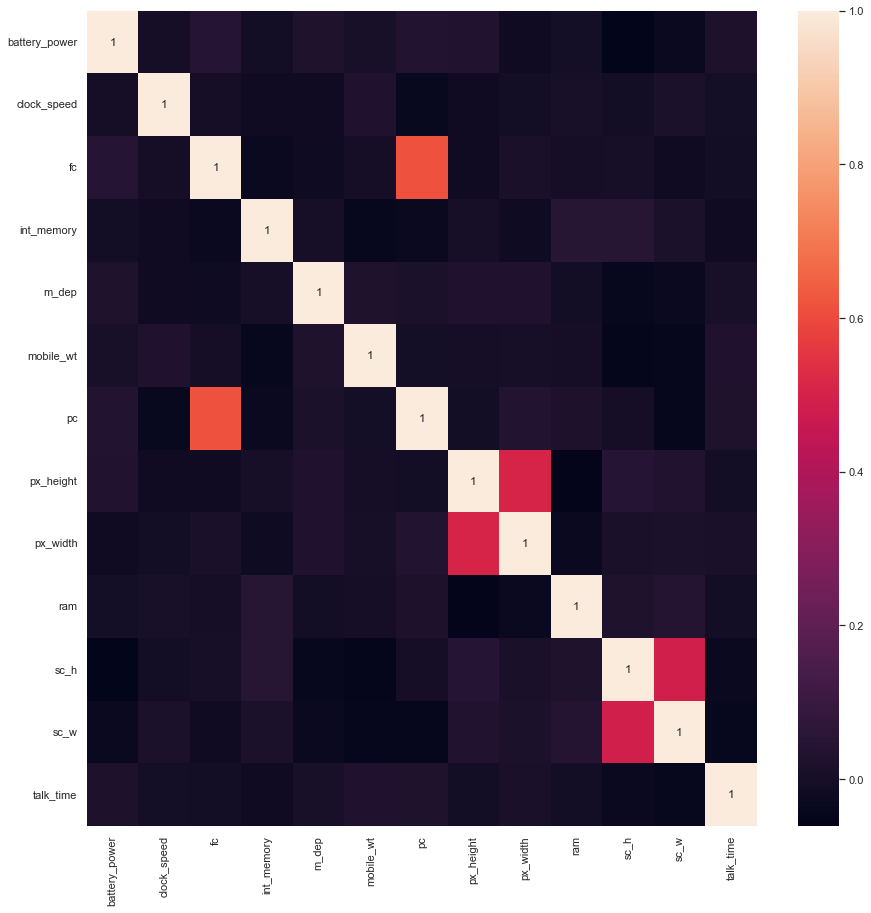

In [86]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(X_train_num.corr(),annot=True)

for t in ax.texts:
    if (float(t.get_text()) > 0.7) | (float(t.get_text()) < -0.7):
        t.set_text(t.get_text())
    else:
        t.set_text('')

Korelasi kuat dianggap bernilai di atas 0.7 atau kurang dari -0.7.

Tidak ada feature yang saling berkorelasi. Buat column transformer dengan keterangan berikut:
- `fc` akan di-cap dengan Winsorizer
- feature numerik lain akan dibiarkan
- `n_cores` akan di-encode secara ordinal
- feature kategorik lain akan di-encode secara one-hot

In [87]:
cat_cols.remove('n_cores')

In [88]:
cat_cols

['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']

In [89]:
#transformer untuk outlier dari feature_engine
winsorizer_skewed = Winsorizer(capping_method='iqr',tail='both',fold=1.5)

In [90]:
#column transformer
prepline = ColumnTransformer([
    ('core_count', OrdinalEncoder(), ['n_cores']),
    ('fc', winsorizer_skewed, ['fc']),
    ('ohe', OneHotEncoder(), cat_cols)
],remainder='passthrough')

### Model Definition

Model yang akan digunakan adalah Decision Tree Classifier dan Random Forest Classifier.

#### Decision Tree Classifier

Untuk Decision Tree, akan dilakukan hyperparameter tuning dengan variasi parameter criterion dan min samples split.

In [91]:
#base model
dtree = DecisionTreeClassifier(random_state=random_state)

#pipeline
pipe_dtree = Pipeline([
    ('prep',prepline),
    ('dtree',dtree)
])

#hyperparameter tuner
params_dtree = {
    'dtree__criterion':['gini','entropy'],
    'dtree__min_samples_split': [2, 5]
}

#### Random Forest Classifier

Untuk Random Forest akan dilakukan hyperparameter tuning dengan variasi parameter jumlah estimator dan min sample split.

In [92]:
#base model
rforest = RandomForestClassifier(random_state=random_state,n_jobs=-1)

#pipeline
pipe_rforest = Pipeline([
    ('prep',prepline),
    ('rforest',rforest)
])

#hyperparameter tuner
params_rforest = {
    'rforest__n_estimators':[50,100],
    'rforest__min_samples_split': [2,5]
}

### Model Training

#### Decision Tree Classifier

In [93]:
grid_dtree = GridSearchCV(
    pipe_dtree, params_dtree, n_jobs=-1, verbose=1, cv=2, scoring='f1_weighted'
).fit(X_train,y_train)

best_params_dtree = grid_dtree.best_params_
best_pipe_dtree = grid_dtree.best_estimator_
df_result_dtree = pd.DataFrame.from_dict(grid_dtree.cv_results_,orient='columns')

Fitting 2 folds for each of 4 candidates, totalling 8 fits


#### Random Forest Classifier

In [94]:
grid_rforest = GridSearchCV(
    pipe_rforest, params_rforest, n_jobs=-1, verbose=1, cv=2, scoring='f1_weighted'
).fit(X_train, y_train)

best_params_rforest = grid_rforest.best_params_
best_pipe_rforest = grid_rforest.best_estimator_
df_result_rforest = pd.DataFrame.from_dict(grid_rforest.cv_results_,orient='columns')

Fitting 2 folds for each of 4 candidates, totalling 8 fits


### Model Evaluation

Pada bab ini akan dilakukan analsis hasil modeling terkait pengaruh parameter terhadap performa model, akurasi model, dan fit model terhadap validation set.

Akurasi yang digunakan pada pembahasan ini adalah F1 score weighted.

Visualisasi model akan menggunakan dua fungsi berikut:

In [95]:
#fungsi plot pengaruh parameter
def param_plot(dataframe):
    #param pada model
    params = [col for col in dataframe.columns if 'param_' in col]
    
    
    fig,ax = plt.subplots(1,len(params), figsize=(len(params)*5,5))
    fig.suptitle('Pengaruh Params terhadap Mean F1 wt.Score')
    #initialize while loop
    i = 0
    
    #while loop untuk plot masing-masing param
    while i < len(params):
        ax[i] = plt.subplot(1,len(params),i+1)
        sns.lineplot(data=dataframe,x=params[i],y='mean_test_score',ax=ax[i])
        ax[i] = plt.xticks(rotation=45)
        i += 1
    plt.show()

In [96]:
#fungsi plot confusion matrix
def cf_graph(best_pipe,y_graph,X_graph):
    #confusion matrix
    cf_matrix = confusion_matrix(y_graph, best_pipe.predict(X_graph))

    #figure size
    sns.set(rc={'figure.figsize':(5,5)})

    #plotting confusion matrix
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', annot_kws={'size':20})
    ax.set_title('Confusion Matrix', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=15)
    ax.set_ylabel('Actual', fontsize=15)
    plt.show()

#### Decision Tree Classifier

Lihat pengaruh parameter terhadap model pada grafik berikut:

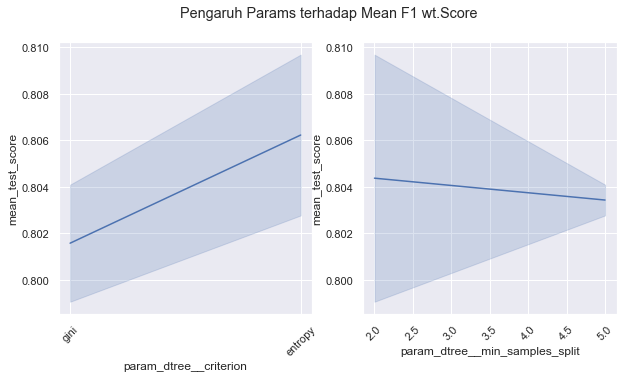

In [97]:
param_plot(df_result_dtree)

Model menghasilkan rata-rata f1 weighted terbaik dengan parameter berikut:

In [98]:
best_params_dtree

{'dtree__criterion': 'entropy', 'dtree__min_samples_split': 2}

- Akurasi tertinggi dihasilkan dengan criterion `entropy`
- Semakin besar nilai min sample split, maka semakin rendah akurasi model yang dihasilkan

Cek akurasinya pada train dan validation set.

In [99]:
#uji fit
print('F1 weighted Train:',f1_score(y_train, best_pipe_dtree.predict(X_train), average='weighted'))
print('F1 weighted Validation:',f1_score(y_val, best_pipe_dtree.predict(X_val), average='weighted'))

F1 weighted Train: 1.0
F1 weighted Validation: 0.84009676507176


Model yang dihasilkan ternyata overfit. Hal ini kemungkinan disebabkan oleh jumlah minimum sample split di masing-masing node sehingga terlalu banyak branch yang dihasilkan dan tidak dibatasi oleh max depth.

Ketika diuji pada validation set maka terjadi generalization error yang besar.

Berikut confusion matrix yang dihasilkan.

Train Set

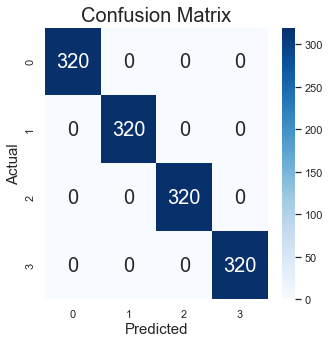

In [100]:
cf_graph(best_pipe_dtree,y_train,X_train)

Validation Set

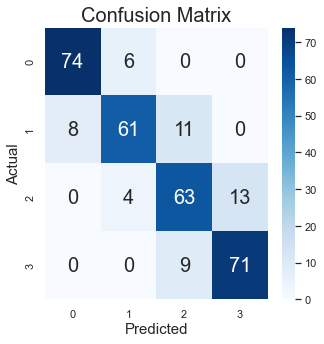

In [101]:
cf_graph(best_pipe_dtree,y_val,X_val)

Masih terdapat beberapa false positive dan false negative dari confusion matrix.

Karakteristik ini akan terbawa ketika dilakukan pengujian model pada dataset lain.

In [102]:
#uji fit
print('F1 weighted Train:',f1_score(y_train, best_pipe_dtree.predict(X_train), average='weighted'))
print('F1 weighted Validation:',f1_score(y_val, best_pipe_dtree.predict(X_val), average='weighted'))
print('F1 weighted Test:',f1_score(y_test, best_pipe_dtree.predict(X_test), average='weighted'))

F1 weighted Train: 1.0
F1 weighted Validation: 0.84009676507176
F1 weighted Test: 0.8518518887283655


Pada test set didapat hasil yang sedikit lebih bagus dari validation set, tetapi jauh di bawah train set.

#### Random Forest Classifier

Lihat pengaruh parameter terhadap model pada grafik berikut:

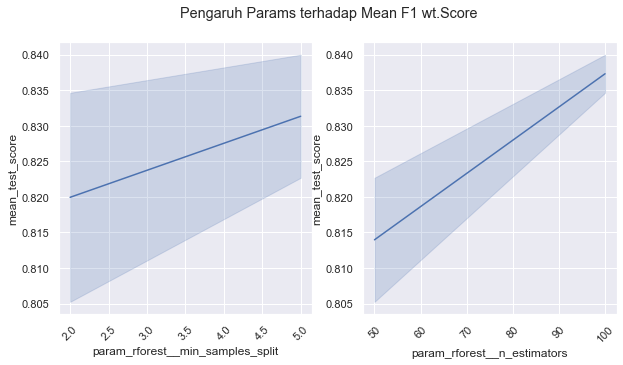

In [103]:
param_plot(df_result_rforest)

Model menghasilkan rata-rata f1 weighted terbaik dengan parameter berikut:

In [104]:
best_params_rforest

{'rforest__min_samples_split': 5, 'rforest__n_estimators': 100}

- Semakin besar nilai min sample split, semakin tinggi akurasi model yang dihasilkan
- Semakin besar jumlah estimator, maka semakin tinggi akurasi model yang dihasilkan

In [105]:
#uji fit
print('F1 weighted Train:',f1_score(y_train, best_pipe_rforest.predict(X_train), average='weighted'))
print('F1 weighted Validation:',f1_score(y_val, best_pipe_rforest.predict(X_val), average='weighted'))

F1 weighted Train: 1.0
F1 weighted Validation: 0.8488761419202915


Sama dengan decision tree, model yang dihasilkan overfit karena max depth tidak ditentukan sehingga model membuat cabang sebanyak mungkin.

Berikut confusion matrix yang dihasilkan.

Train Set

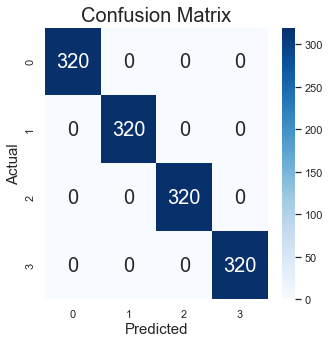

In [106]:
cf_graph(best_pipe_rforest,y_train,X_train)

Validation Set

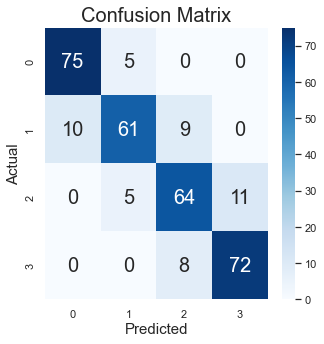

In [107]:
cf_graph(best_pipe_rforest,y_val,X_val)

False positive dan negative terlihat pada validation set, tetapi tidak pada train set. Berikut akurasinya terhadap test set.

In [108]:
#uji fit
print('F1 weighted Train:',f1_score(y_train, best_pipe_rforest.predict(X_train), average='weighted'))
print('F1 weighted Validation:',f1_score(y_val, best_pipe_rforest.predict(X_val), average='weighted'))
print('F1 weighted Test:',f1_score(y_test, best_pipe_rforest.predict(X_test), average='weighted'))

F1 weighted Train: 1.0
F1 weighted Validation: 0.8488761419202915
F1 weighted Test: 0.8752741002547505


Sama dengan decision tree, karakteristik overfit juga dirasakan pada test set.

### Model Inference

Lakukan inference pada data dari inference set.

In [109]:
data_inf.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [110]:
X_inf = data_inf.drop('id',axis=1)

In [111]:
data_inf['price_range_dtree'] = best_pipe_dtree.predict(X_inf)
data_inf['price_range_rforest'] = best_pipe_rforest.predict(X_inf)

In [112]:
data_inf.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range_dtree,price_range_rforest
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3,3
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,2,1


Dari inference di atas terlihat ada perbedaan prediksi `price_range` dari model Decision Tree dan Random Forest.

### Pengambilan Kesimpulan

Berdasarkan analisis yang telah dilakukan, berikut kesimpulan yang didapat:
1. Kedua model yang dihasilkan memiliki generalization error yang tinggi akibat tidak ditentukannya max depth sehingga model overfitting pada train set sehingga performanya jauh lebih rendah dibandingkan performa pada train set.
2. Dari model yang dihasilkan, model random forest memiliki tingkat akurasi (F1 weighted) yang lebih tinggi dari model decision tree
3. Pada model random forest, berikut pengaruh parameter terhadap akurasi:
    - Semakin besar nilai min sample split, semakin tinggi akurasi model yang dihasilkan
    - Semakin besar jumlah estimator, maka semakin tinggi akurasi model yang dihasilkan
4. Pada model decision tree, berikut pengaruh parameter terhadap akurasi:
    - Akurasi tertinggi dihasilkan dengan criterion `entropy`
    - Semakin besar nilai min sample split, maka semakin rendah akurasi model yang dihasilkan